In [17]:
import seaborn as sns
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt

% matplotlib notebook

#import mpld3
#mpld3.enable_notebook()

import sys
sys.path.insert(0, '../code/')

import run_plotting

# Make results plots by running the following cells.

In [4]:
files = list()
import glob, os

for file in glob.glob("../data/paper_plots/ztf_lightcurves/*.hdf5"):
    files.append(file)
    
files[2]

'../data/paper_plots/ztf_lightcurves/1173.txt.hdf5'

In [ ]:
for i in np.arange(len(files)):
    run_plotting.make_summary_plots(files[i], true_lightcurve=None, true_period=None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

../code/run_plotting.py:434: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(6,4))


<IPython.core.display.Javascript object>

../code/run_plotting.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(3,2, figsize=(10,10))


<IPython.core.display.Javascript object>

../code/run_plotting.py:234: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(2, 2, figsize=(10,9))


<IPython.core.display.Javascript object>

/home/christina/anaconda3/lib/python3.7/site-packages/corner/corner.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = pl.subplots(K, K, figsize=(dim, dim))


<IPython.core.display.Javascript object>

/home/christina/anaconda3/lib/python3.7/site-packages/corner/corner.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = pl.subplots(K, K, figsize=(dim, dim))


<IPython.core.display.Javascript object>

/home/christina/anaconda3/lib/python3.7/site-packages/corner/corner.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = pl.subplots(K, K, figsize=(dim, dim))


<IPython.core.display.Javascript object>

../code/run_plotting.py:576: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax, bx, cx) = plt.subplots(1, 3, figsize=(15,4))


<IPython.core.display.Javascript object>

../code/run_plotting.py:434: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(6,4))


<IPython.core.display.Javascript object>

../code/run_plotting.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(3,2, figsize=(10,10))


<IPython.core.display.Javascript object>

../code/run_plotting.py:234: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(2, 2, figsize=(10,9))


<IPython.core.display.Javascript object>

/home/christina/anaconda3/lib/python3.7/site-packages/corner/corner.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = pl.subplots(K, K, figsize=(dim, dim))


<IPython.core.display.Javascript object>

/home/christina/anaconda3/lib/python3.7/site-packages/corner/corner.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = pl.subplots(K, K, figsize=(dim, dim))


<IPython.core.display.Javascript object>

/home/christina/anaconda3/lib/python3.7/site-packages/corner/corner.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = pl.subplots(K, K, figsize=(dim, dim))


<IPython.core.display.Javascript object>

../code/run_plotting.py:576: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax, bx, cx) = plt.subplots(1, 3, figsize=(15,4))


<IPython.core.display.Javascript object>

../code/run_plotting.py:434: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(6,4))


<IPython.core.display.Javascript object>

../code/run_plotting.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(3,2, figsize=(10,10))


<IPython.core.display.Javascript object>

../code/run_plotting.py:234: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(2, 2, figsize=(10,9))


<IPython.core.display.Javascript object>

/home/christina/anaconda3/lib/python3.7/site-packages/corner/corner.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = pl.subplots(K, K, figsize=(dim, dim))


<IPython.core.display.Javascript object>

/home/christina/anaconda3/lib/python3.7/site-packages/corner/corner.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = pl.subplots(K, K, figsize=(dim, dim))


<IPython.core.display.Javascript object>

/home/christina/anaconda3/lib/python3.7/site-packages/corner/corner.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = pl.subplots(K, K, figsize=(dim, dim))


<IPython.core.display.Javascript object>

../code/run_plotting.py:576: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax, bx, cx) = plt.subplots(1, 3, figsize=(15,4))


<IPython.core.display.Javascript object>

../code/run_plotting.py:434: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(6,4))


<IPython.core.display.Javascript object>

../code/run_plotting.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(3,2, figsize=(10,10))


<IPython.core.display.Javascript object>

../code/run_plotting.py:234: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(2, 2, figsize=(10,9))


<IPython.core.display.Javascript object>

/home/christina/anaconda3/lib/python3.7/site-packages/corner/corner.py:207: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = pl.subplots(K, K, figsize=(dim, dim))


<IPython.core.display.Javascript object>

In [39]:
filename = "../data/paper_plots/ztf_lightcurves/1437.txt.hdf5"
#filename = "../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_10days.txt.hdf5"

In [131]:
true_lightcurve_filename = "../data/paper_plots/3200/3200_lc_49627_to_49787.txt"
#true_lightcurve_filename = "../data/paper_plots/3200/3200_lc_49627_to_49787.txt"
true_lightcurve_data = pd.read_csv(true_lightcurve_filename, delimiter=" ", header=None, names=['time','flux'], dtype={'time':float, 'flux':float})
true_lightcurve = [true_lightcurve_data.time[0:5000], true_lightcurve_data.flux[0:5000]]

<IPython.core.display.Javascript object>


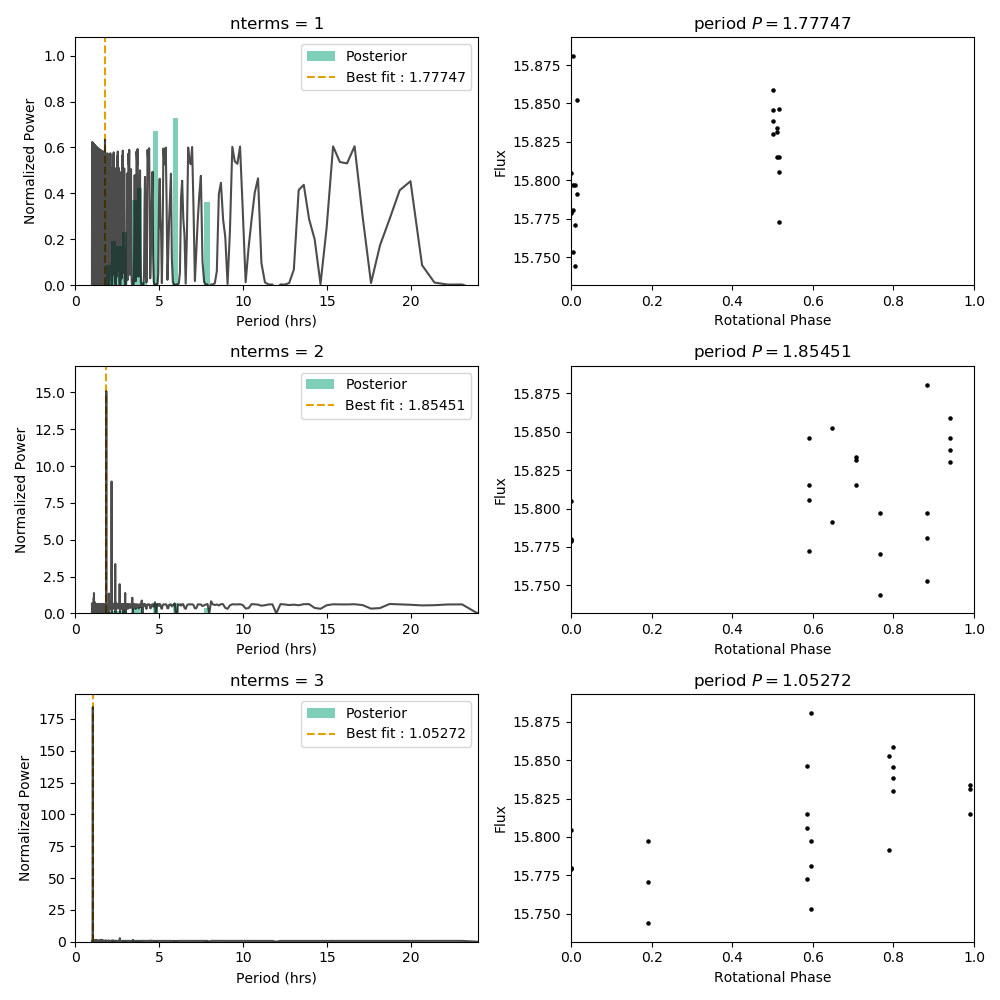

<IPython.core.display.Javascript object>


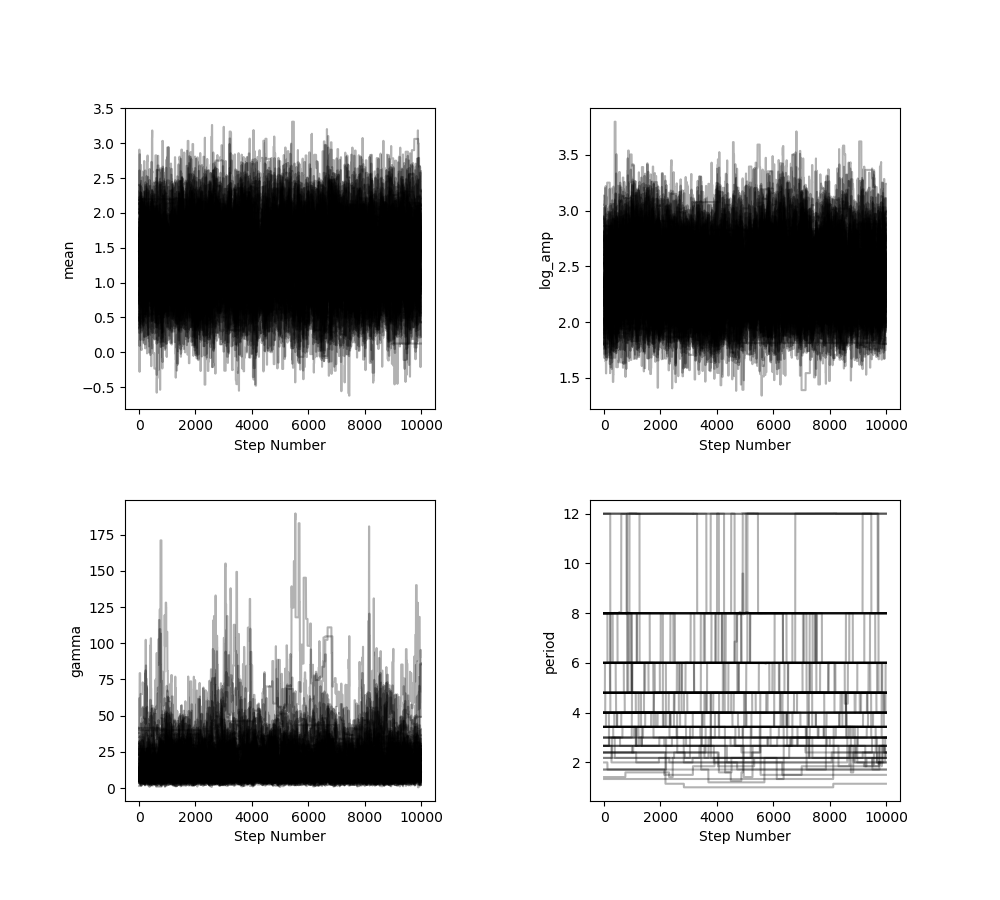

<IPython.core.display.Javascript object>


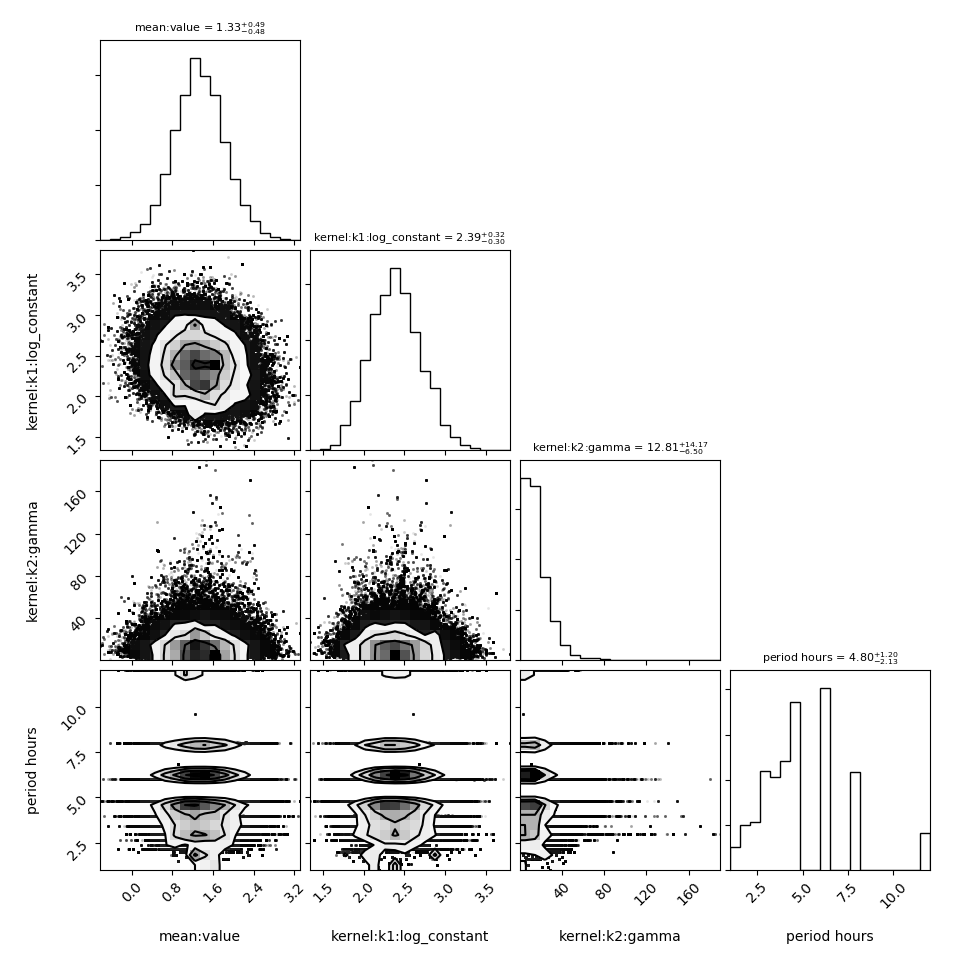

<IPython.core.display.Javascript object>


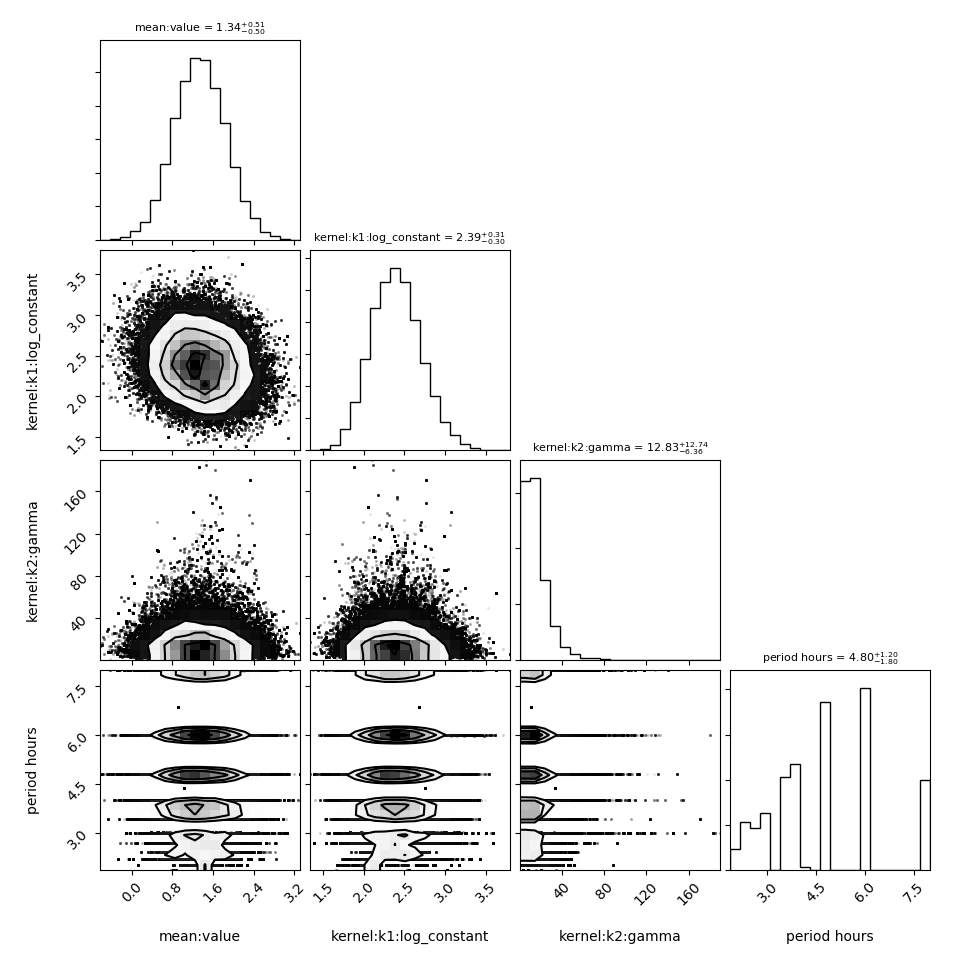

<IPython.core.display.Javascript object>


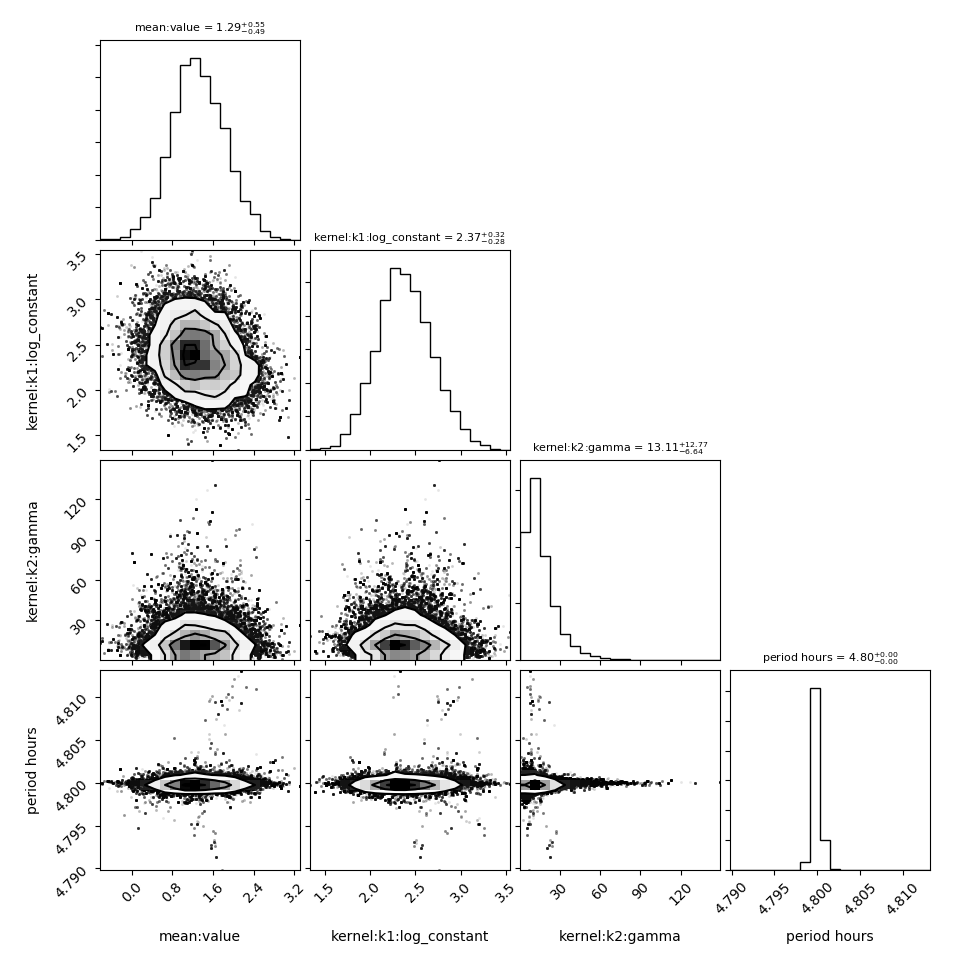

<IPython.core.display.Javascript object>


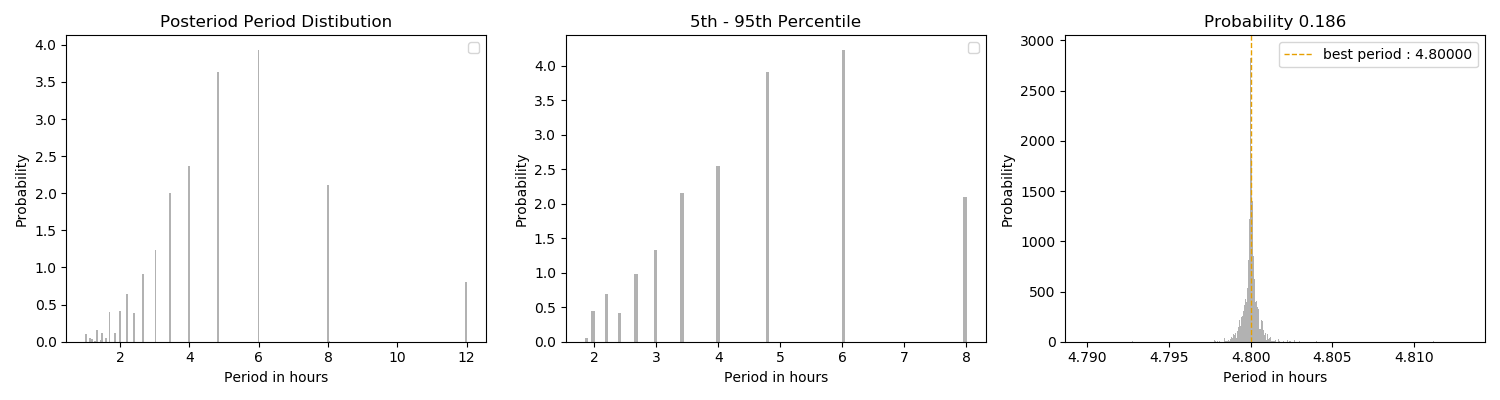

<IPython.core.display.Javascript object>


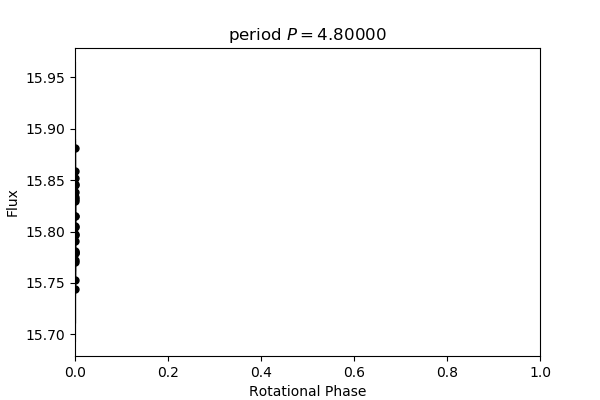

In [40]:
run_plotting.make_summary_plots(filename, true_lightcurve=None, true_period=None) #MAKE SURE TO CHECK THE PERIOD

# Here is a violin plot compiling all the data

In [24]:
filename = "../data/paper_plots/3200/ztf-lsst/burn_in_10k/"

In [25]:
files = list()
import glob, os

for file in glob.glob(filename + "*.hdf5"):
    files.append(file)
    
files

['../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_20days.txt.hdf5',
 '../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_10days.txt.hdf5',
 '../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_30days.txt.hdf5',
 '../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_50days.txt.hdf5',
 '../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_40days.txt.hdf5',
 '../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_60days.txt.hdf5']

Make sure the files are sorted.

In [26]:
files.sort()
files

['../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_10days.txt.hdf5',
 '../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_20days.txt.hdf5',
 '../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_30days.txt.hdf5',
 '../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_40days.txt.hdf5',
 '../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_50days.txt.hdf5',
 '../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_60days.txt.hdf5']

In [27]:
lsp_period_all = np.array([])
lsp_data_points = np.array([])

x = np.array([])
data_meta = np.array([])

for i in np.arange(len(files)):
    filename = files[i]
    print(filename)
    
    with h5py.File(filename, "r") as f:
        data = f['chain'][:]
        time = f['time'][:]
        flux = f["flux"][:]
        flux_err = f['flux_err'][:]
        true_period = 3.604
        data_pts = f.attrs["data_pts"]

        gp = run_plotting.set_kernel(time, flux, flux_err)

        data[:,:,3] = np.exp(data[:,:,3])*24.
        
        # mask outliers and flatten data
        lower, upper = np.percentile(data[:,:,3], [5,95])
        masked_data = data[(data[:,:,3]>lower) & (data[:,:,3]<upper)]
        flat_data = data.reshape(data.shape[0]*data.shape[1], data.shape[2])
    
    #print((list(np.arange(data_pts, data_pts+1))))
    #print(list(np.arange(data_pts, data_pts+1))*len(masked_data[:,3]))
    
        lsp_period = run_plotting.run_lsp(time, flux, flux_err, data, true_period)     
        lsp_period_all = np.append(lsp_period_all, lsp_period)
        
        a=np.empty(3); a.fill(data_pts)
        lsp_data_points = np.append(lsp_data_points, a)
    
        x = np.append(x, np.array(list(np.arange(data_pts, data_pts+1))*len(flat_data[:,3])))
        data_meta = np.append(data_meta, flat_data[:,3])
        
    

../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_10days.txt.hdf5
../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_20days.txt.hdf5
../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_30days.txt.hdf5
../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_40days.txt.hdf5
../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_50days.txt.hdf5
../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_60days.txt.hdf5


Now we have an ordered list of all the lsp period and their corresponding number of data points.

In [28]:
n_terms = np.array(list(np.arange(1,4))*len(files))

In [29]:
df_lsp1 = pd.DataFrame(data = lsp_data_points, columns = ["data_pts"], dtype=int)
df_lsp2 = pd.DataFrame(data = lsp_period_all, columns = ["lsp_period"])
df_lsp3 = pd.DataFrame(data = n_terms, columns = ["n_terms"])

Combining the three separate data frames...

In [30]:
df_lsp12 = df_lsp1.join(df_lsp2)
df_lsp = df_lsp12.join(df_lsp3)

In [31]:
df_lsp

,data_pts,lsp_period,n_terms
0,20,1.804237,1
1,20,1.358283,2
2,20,2.286301,3
3,40,1.568075,1
4,40,1.143132,2
5,40,3.136220,3
6,60,1.471754,1
7,60,1.263718,2
8,60,2.773217,3
9,80,1.310728,1


In [32]:
df1 = pd.DataFrame(data = x, columns = ["data_pts"], dtype=int)
df2 = pd.DataFrame(data = data_meta, columns = ["period"])
df = df1.join(df2)

In [33]:
lsp_bs_x = np.sort(np.array(list(np.arange(0,len(files)))*3))

In [34]:
lsp_bs_x

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5])

In [35]:
df_lsp[n_terms==1]

,data_pts,lsp_period,n_terms
0,20,1.804237,1
3,40,1.568075,1
6,60,1.471754,1
9,80,1.310728,1
12,100,1.310728,1
15,120,1.310728,1


<IPython.core.display.Javascript object>


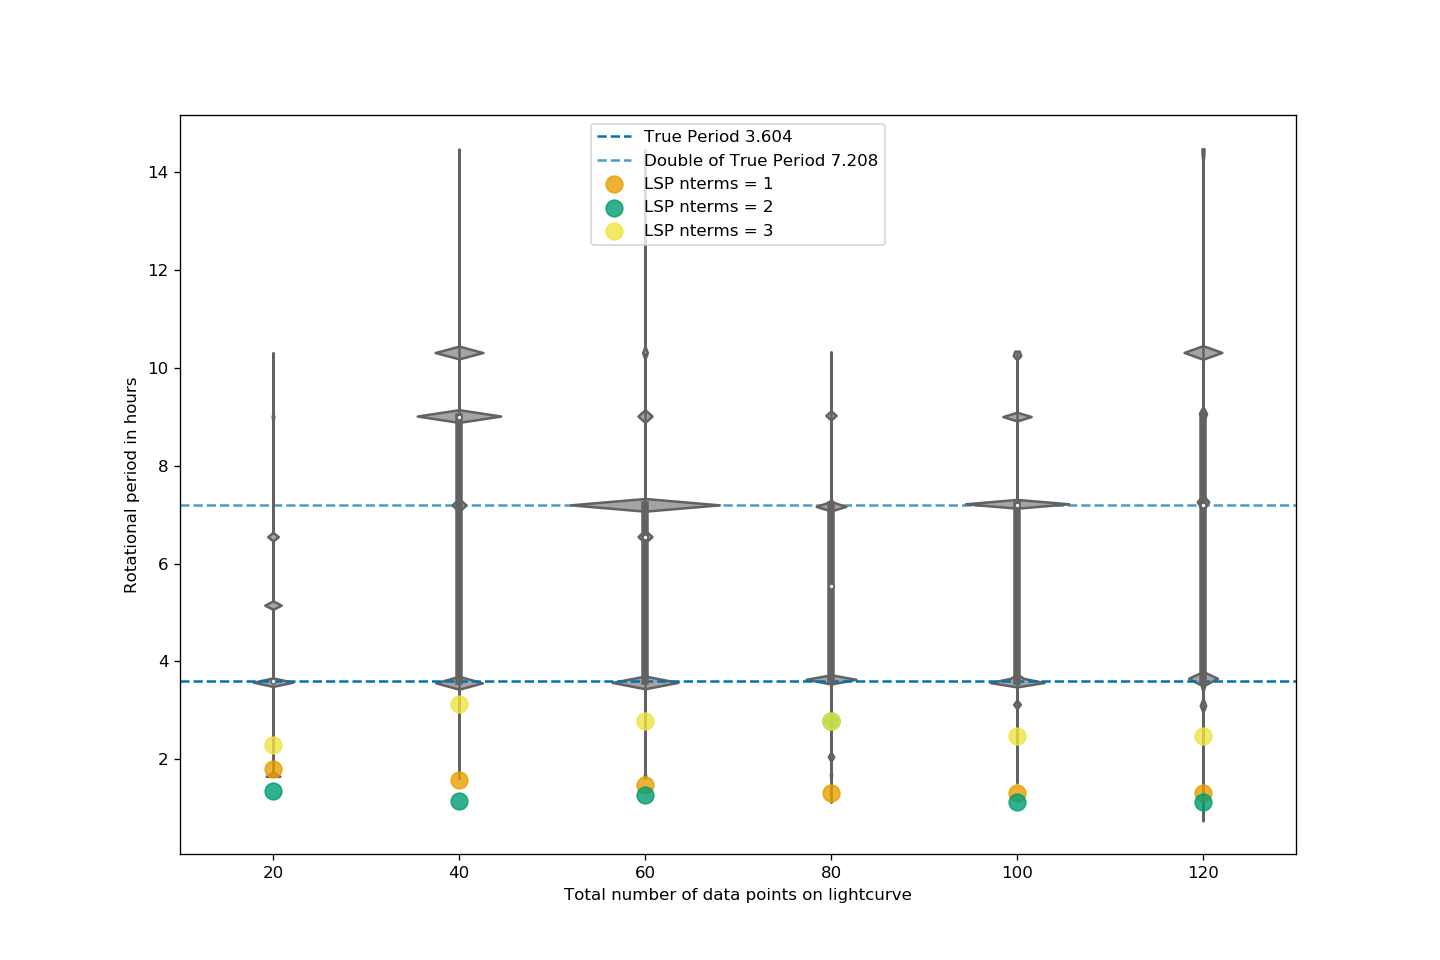

/home/christina/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [37]:
from matplotlib import colors

fig, ax = plt.subplots(1, 1, figsize=(12,8))
#sns.set(style="whitegrid")

colours = ["#000000", "#0072B2", "#E69F00", "#009E73", "#F0E442"]

true_period = 3.604

ax.hlines(true_period, -1,6, colors=colours[1], linestyles='dashed', label="True Period %.3f" %true_period, zorder=2)
ax.hlines(true_period*2, -1, 6, colors=colours[1], alpha=0.7, linestyles='dashed', label="Double of True Period %.3f" %(true_period*2), zorder=1)
#ax.hlines(true_period/3, -1, 6, colors=colours[1], alpha=0.3, linestyles='dashed', label="Third of True Period %.3f" %(true_period/3), zorder=1)

    
ax.scatter(np.arange(0,len(files)), df_lsp[n_terms==1].lsp_period, s=100, c=colours[2], alpha=0.8, zorder=3, label="LSP nterms = 1")
ax.scatter(np.arange(0,len(files)), df_lsp[n_terms==2].lsp_period, s=100, c=colours[3], alpha=0.8, zorder=3, label="LSP nterms = 2")
ax.scatter(np.arange(0,len(files)), df_lsp[n_terms==3].lsp_period, s=100, c=colours[4], alpha=0.8, zorder=3, label="LSP nterms = 3")
ax.legend()

sns.violinplot(x = "data_pts", y = "period", data=df, bw=0.01, scale="area", color="#A4A4A3", ax=ax, zorder=1, label="Posterior\nDistribution")


ax.set_ylabel("Rotational period in hours")
ax.set_xlabel("Total number of data points on lightcurve")

plt.savefig(filename + "_3200_ztf-lsst_violin.pdf", format="pdf")


# Plot and table of all probablilities for all the runs

In [4]:
filename = "../data/paper_plots/221/ztf-lsst/burn_in_10k/"

In [5]:
files = list()
import glob, os

for file in glob.glob(filename + "*.hdf5"):
    files.append(file)
    
files

['../data/paper_plots/221/ztf-lsst/burn_in_10k/221_lc_49627_to_49787.txt_sampled_ztf-lsst_10days.txt.hdf5',
 '../data/paper_plots/221/ztf-lsst/burn_in_10k/221_lc_49627_to_49787.txt_sampled_ztf-lsst_30days.txt.hdf5',
 '../data/paper_plots/221/ztf-lsst/burn_in_10k/221_lc_49627_to_49787.txt_sampled_ztf-lsst_40days.txt.hdf5',
 '../data/paper_plots/221/ztf-lsst/burn_in_10k/221_lc_49627_to_49787.txt_sampled_ztf-lsst_60days.txt.hdf5',
 '../data/paper_plots/221/ztf-lsst/burn_in_10k/221_lc_49627_to_49787.txt_sampled_ztf-lsst_50days.txt.hdf5',
 '../data/paper_plots/221/ztf-lsst/burn_in_10k/221_lc_49627_to_49787.txt_sampled_ztf-lsst_20days.txt.hdf5']

../data/paper_plots/221/ztf-lsst/burn_in_10k/221_lc_49627_to_49787.txt_sampled_ztf-lsst_10days.txt.hdf5
0.28217699999991264
0.24875199999991035
../data/paper_plots/221/ztf-lsst/burn_in_10k/221_lc_49627_to_49787.txt_sampled_ztf-lsst_30days.txt.hdf5
0.4846039999999151
0.14457500000012022
../data/paper_plots/221/ztf-lsst/burn_in_10k/221_lc_49627_to_49787.txt_sampled_ztf-lsst_40days.txt.hdf5
0.5936350000010872
0.23633000000024423
../data/paper_plots/221/ztf-lsst/burn_in_10k/221_lc_49627_to_49787.txt_sampled_ztf-lsst_60days.txt.hdf5
0.4973910000001701
0.14254300000005382
../data/paper_plots/221/ztf-lsst/burn_in_10k/221_lc_49627_to_49787.txt_sampled_ztf-lsst_50days.txt.hdf5
0.32276899999995023
0.33612699999985596
../data/paper_plots/221/ztf-lsst/burn_in_10k/221_lc_49627_to_49787.txt_sampled_ztf-lsst_20days.txt.hdf5
0.3100000000000387
0.5846699999999827


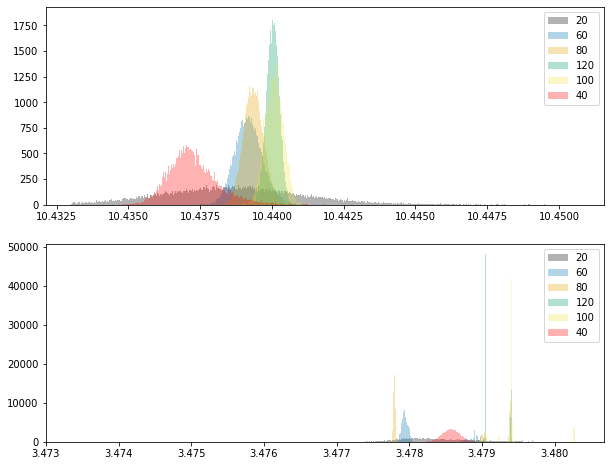

In [12]:
data_points = np.array([])
post_probs_period = np.array([])
post_probs_period_2 = np.array([])


colours = ["#000000", "#0072B2", "#E69F00", "#009E73", "#F0E442", 'red']

fig, (ax,bx) = plt.subplots(2,1, figsize=(10,8))

for i in np.arange(len(files)):
    filename = files[i]
    print(filename)
    
    with h5py.File(filename, "r") as f:
        data = f['chain'][:]
        time = f['time'][:]
        flux = f["flux"][:]
        flux_err = f['flux_err'][:]
        true_period = 10.443 #MAKE SURE THE PERIOD IS CORRECT: 10.443 (221) and 3.604 (3200)
        #double_period = true_period*2
        third_period = true_period/3.
        data_pts = f.attrs["data_pts"]
        
        data[:,:,3] = np.exp(data[:,:,3])*24.
        
        data_points = np.append(data_points, data_pts)
        
        prob, edges = run_plotting.calc_prob(data, true_period, plot=False, width=0.01)
        
        if prob != 0:
            
        
            zoom_data = data[(data[:,:,3]>edges[0]) & (data[:,:,3]<edges[1])]
            best_period = np.percentile(zoom_data[:,3], 50)

            

            ax.hist(zoom_data[:,3], bins=500, density=True, color=colours[i], alpha=0.3, label="%d" %data_pts)
            #ax.axvline(true_period)
            ax.legend()

            print(prob)

            post_probs_period = np.append(post_probs_period, prob)
            
        else: 
            
            post_probs_period = np.append(post_probs_period, prob)
        
        ###double the period
        
        prob2, edges2 = run_plotting.calc_prob(data, third_period, plot=False, width=0.01)
        print(prob2)
        
        if prob2 != 0:
            zoom_data2 = data[(data[:,:,3]>edges2[0]) & (data[:,:,3]<edges2[1])]
            best_period2 = np.percentile(zoom_data2[:,3], 50)

            post_probs_period_2 = np.append(post_probs_period_2, prob2)

            bx.hist(zoom_data2[:,3], bins=1000, density=True, color=colours[i], alpha=0.3, label="%d" %data_pts) #range=[third_period-0.005, third_period+0.005]
            bx.legend()
            
        else: 
            
            post_probs_period_2 = np.append(post_probs_period_2, prob2)


In [13]:
post_probs_total = post_probs_period+post_probs_period_2

post_probs_total

array([0.530929, 0.629179, 0.829965, 0.639934, 0.658896, 0.89467 ])

In [14]:
pd.DataFrame(np.array([data_points, post_probs_period, post_probs_period_2, post_probs_total]).T, 
             columns=["Data Points","Prob. True Period","Prob. Double Period", "Total"],)

,Data Points,Prob. True Period,Prob. Double Period,Total
0,20.0,0.282177,0.248752,0.530929
1,60.0,0.484604,0.144575,0.629179
2,80.0,0.593635,0.236330,0.829965
3,120.0,0.497391,0.142543,0.639934
4,100.0,0.322769,0.336127,0.658896
5,40.0,0.310000,0.584670,0.894670


# Comparing lightcurve profiles 60 days apart

In [15]:
asteriod = 3200

In [16]:
filename = "../data/paper_plots/%d/ztf-lsst/burn_in_10k/%d_lc_49627_to_49787.txt_sampled_ztf-lsst_60days.txt.hdf5" %(asteriod, asteriod)

In [17]:
#true_lightcurve_filename = "../data/paper_plots/221/221_lc_49627_to_49787.txt"
true_lightcurve_filename = "../data/paper_plots/%d/%d_lc_49627_to_49787.txt" %(asteriod, asteriod)
true_lightcurve_data = pd.read_csv(true_lightcurve_filename, delimiter=" ", header=None, names=['time','flux'], dtype={'time':float, 'flux':float})


In [18]:
with h5py.File(filename, "r") as f:
        data = f['chain'][:]
        time = f['time'][:]
        flux = f["flux"][:]
        flux_err = f['flux_err'][:]
        
        if asteriod == 3200:
            period = 3.604
        else:
            period = 10.443

        data_pts = f.attrs["data_pts"]
        
        start_time = time[0]
        end_time = time[-1]
        
        dt = time[0]+period/24.
          

In [19]:
start_ind = int(np.searchsorted(true_lightcurve_data.time, start_time))
end_ind = int(np.searchsorted(true_lightcurve_data.time, end_time))
dt_ind = int(np.searchsorted(true_lightcurve_data.time, dt) - np.searchsorted(true_lightcurve_data.time, start_time))

In [20]:
true_lightcurve_time = np.append(true_lightcurve_data.time[start_ind:dt_ind+start_ind], true_lightcurve_data.time[end_ind-dt_ind: end_ind])
true_lightcurve_flux = np.append(true_lightcurve_data.flux[start_ind:dt_ind+start_ind], true_lightcurve_data.flux[end_ind-dt_ind: end_ind])

<IPython.core.display.Javascript object>


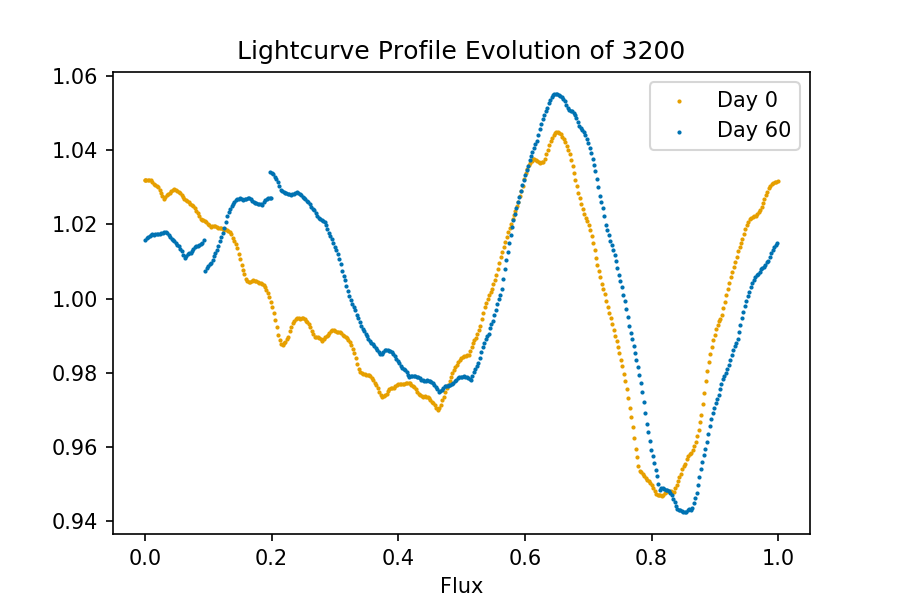

Text(0.5, 1.0, 'Lightcurve Profile Evolution of 3200')

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
colours = ["#000000", "#0072B2", "#E69F00", "#009E73", "#F0E442"]

period_days = period/24.
t0 = np.min(true_lightcurve_data.time)

phase = (true_lightcurve_data.time[start_ind:dt_ind+start_ind]-t0)/period_days - np.floor((true_lightcurve_data.time[start_ind:dt_ind+start_ind]-t0)/period_days)
ax.scatter(phase, true_lightcurve_data.flux[start_ind:dt_ind+start_ind], s=1, color=colours[2], label="Day 0")

phase = (true_lightcurve_data.time[end_ind-dt_ind: end_ind]-t0)/period_days - np.floor((true_lightcurve_data.time[end_ind-dt_ind: end_ind]-t0)/period_days)
ax.scatter(phase, true_lightcurve_data.flux[end_ind-dt_ind: end_ind], s=1, color=colours[1], label="Day 60")

ax.legend()
ax.set_xlabel("Phase")
ax.set_xlabel("Flux")
ax.set_title("Lightcurve Profile Evolution of %d" %asteriod)

# Testing likelihoods of 3200 10 days vs 60 days

In [9]:
from run_gp import read_data, GPFit
import scipy.stats

In [10]:
time_10, flux_10, flux_err_10 = read_data("../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_10days.txt")
time_60, flux_60, flux_err_60 = read_data("../data/paper_plots/3200/ztf-lsst/burn_in_10k/3200_lc_49627_to_49787.txt_sampled_ztf-lsst_60days.txt")

In [11]:
asteroid_10 = GPFit(time_10, flux_10, flux_err_10)
asteroid_10.set_params()
asteroid_10.set_gp_kernel()
gp = asteroid_10.gp

In [20]:
lnL_10 = np.array([])
lnL_60 = np.array([])

for i in np.arange(3.5, 3.7,0.0001):
    gp.set_parameter_vector([1, -3.5, 2.7, np.log(i/24.)])
    gp.compute(time_10, flux_err_10)
    lnL_10 = np.append(lnL_10, gp.lnlikelihood(flux_10))
    
    p_log_period = scipy.stats.norm(np.log(4./24.), (12./24.)).logpdf(np.log(i/24.))
    
    post_10 = lnL_10 + p_log_period
    


for i in np.arange(3.5, 3.7,0.0001):
    gp.set_parameter_vector([1, -3.5, 2.7, np.log(i/24.)])
    gp.compute(time_60, flux_err_60)
    lnL_60 = np.append(lnL_60, gp.lnlikelihood(flux_60))
    
    p_log_period = scipy.stats.norm(np.log(4./24.), (12./24.)).logpdf(np.log(i/24.))
    
    post_60 = lnL_60 + p_log_period

In [21]:
lnL_10_double = np.array([])
lnL_60_double = np.array([])

for i in np.arange(7.1, 7.3,0.0001):
    gp.set_parameter_vector([1, -3.5, 11, np.log(i/24.)])
    gp.compute(time_10, flux_err_10)
    lnL_10_double = np.append(lnL_10_double, gp.lnlikelihood(flux_10))
    
    p_log_period = scipy.stats.norm(np.log(4./24.), (12./24.)).logpdf(np.log(i/24.))
    
    post_10_double = lnL_10_double + p_log_period
    


for i in np.arange(7.1, 7.3, 0.0001):
    gp.set_parameter_vector([1, -3.5, 11, np.log(i/24.)])
    gp.compute(time_60, flux_err_60)
    lnL_60_double = np.append(lnL_60_double, gp.lnlikelihood(flux_60))
    
    p_log_period = scipy.stats.norm(np.log(4./24.), (12./24.)).logpdf(np.log(i/24.))
    
    post_60_double = lnL_60_double + p_log_period

<IPython.core.display.Javascript object>


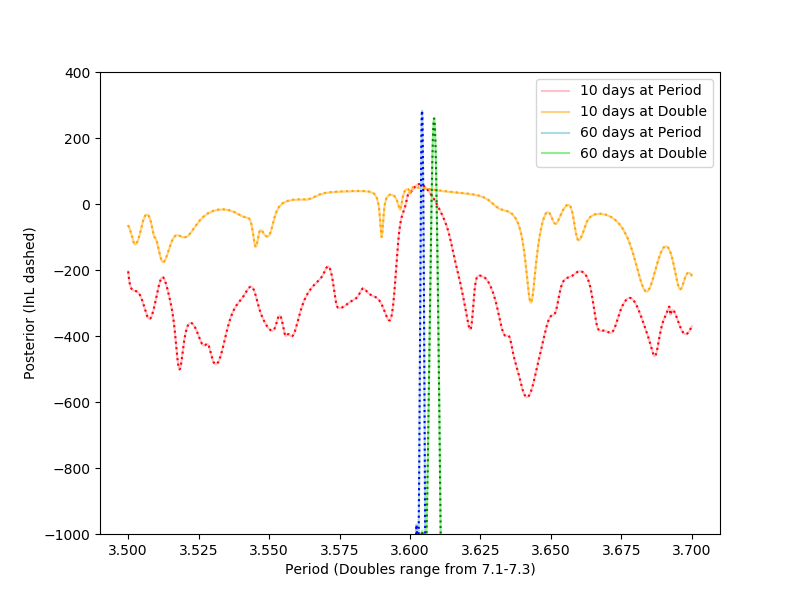

In [47]:
fig, ax = plt.subplots(1, 1, figsize=[8,6])

ax.plot(np.arange(3.5, 3.7,0.0001), post_10, "pink", label="10 days at Period")
ax.plot(np.arange(3.5, 3.7,0.0001), post_10_double, "orange", alpha=0.5,label="10 days at Double")
ax.plot(np.arange(3.5, 3.7,0.0001), post_60, "lightblue", label="60 days at Period")
ax.plot(np.arange(3.5, 3.7,0.0001), post_60_double, 'lightgreen', label="60 days at Double")


ax.plot(np.arange(3.5, 3.7,0.0001), lnL_10, 'r:')
ax.plot(np.arange(3.5, 3.7,0.0001), lnL_10_double, ":",c='orange')
ax.plot(np.arange(3.5, 3.7,0.0001), lnL_60, 'b:')
ax.plot(np.arange(3.5, 3.7,0.0001), lnL_60_double, 'g:')

ax.legend()
ax.set_ylim([-1000,400])

ax.set_xlabel("Period (Doubles range from 7.1-7.3)")
ax.set_ylabel("Posterior (lnL dashed)")
plt.show()

# Plot comparing ZTF known periods vs GP periods

In [2]:
files = list()
import glob, os

for file in glob.glob("../data/paper_plots/ztf_lightcurves/*.hdf5"):
    files.append(file)
    
files[2]

'../data/paper_plots/ztf_lightcurves/1173.txt.hdf5'

In [3]:
files[0].split('/')[-1].split('.')[0]

'11397'

In [4]:
for i in np.arange(len(files)):
    print(files[i].split('/')[-1].split('.')[0])

NameError: name 'np' is not defined

In [7]:
ztf_name = np.array([])
N_obs = np.array([])
gp_period = np.array([])

for i in np.arange(len(files)):
    with h5py.File(files[i], "r") as f:
        data = f['chain'][:]
        data[:,:,3] = np.exp(data[:,:,3])*24.
        true_period=None

        time = f['time'][:]
        obs = len(time)        
        N_obs = np.append(N_obs, obs)
        
        ztf_name = np.append(ztf_name, files[i].split('/')[-1].split('.')[0])
        
        # zoom in on the part of the graph that has the highest probability
        prob, edges = run_plotting.calc_prob(data, true_period, plot=False)

        if prob==0:
             raise Exception('WARNING: Probability around period is 0 and therefore cannot display a valid corner plot.')

        zoom_data = data[(data[:,:,3]>edges[0]) & (data[:,:,3]<edges[1])]

        best_period = np.percentile(zoom_data[:,3], 50)
        gp_period = np.append(gp_period, best_period)

In [9]:
df_gp = pd.DataFrame(np.array([ztf_name, N_obs, gp_period]).T, columns=["ztf", "N_obs", "gp_period"])

In [11]:
df_gp.to_csv("gp_periods")

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_aspect('equal')
plt.scatter(obj_data.rot, obj_data.Period, c=obj_data.Nobs)
plt.colorbar(shrink=0.8, label='N_Obs')
x = np.arange(0, 50)
plt.plot(x, x, 'r:')
plt.plot(x, x/2, 'r:')
plt.axvline(24.0, color='g', linestyle=':')
plt.ylim(0, 50)
plt.xlim(0, 50)
plt.grid(True, alpha=0.3)
plt.ylabel('Fit period (hrs)')
plt.xlabel('Previously measured period (hrs)')